# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
sns.set_style('whitegrid')

In [13]:
df = pd.read_csv('product_sales.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Data Validation

The dataset contains of **8 columns and 15000 rows/entries** before cleaning and validation. I have validated the data according to the description.

- week: 6 unique value without missing value, same as the description. No cleaning required.
- sales_method: 5 unique value found instead of 3. Replacing 'email + call' and 'email' accoringly. 
- nb_sold : No null value found. Datatype matches the description. No cleaning required.
- revenue : 1074 Null values found. Since the revuenue is null however, the coinciding number of product sold is greater than 0 we drop the null values as the total null value does not increase more than 5% of the total data.
- years_as_customer : There were values greater than 39 which would be incorrect as the company was founded in 1984. Removing the values that have value greater than 39. 
- nb_site_visits : No null values. All values match the description. No cleaning required. 
- state : all values are unique and match the description.

After cleaning and validating the dataset contains **13922 rows/entries and 7 columns** without missing values. 

In [15]:
df['sales_method'].replace('em + call', 'Email + Call', inplace=True)
df['sales_method'].replace('email','Email', inplace=True)
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [16]:
df.dropna(inplace=True)

In [17]:
df = df[df['years_as_customer'] < 39]

In [18]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


### How sales differ for each approach?

From the past 6 weeks' record, the most common type of sales method is Email. With around 7000 customers solely dedicated to Email sales method. We can also see that Email + Call is the least used sales method. Perhaps this is due to the cost for preparing this method is simply too much. 

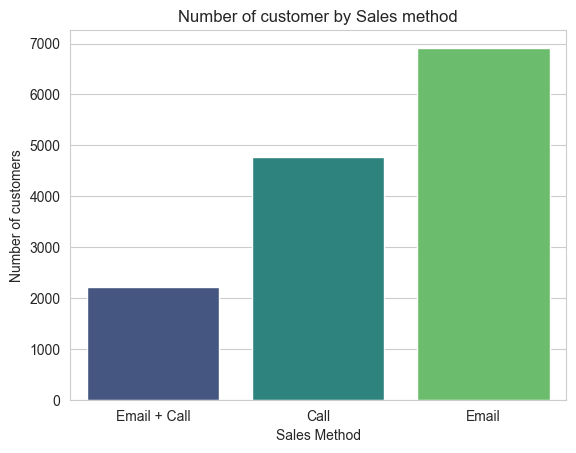

In [28]:
sns.countplot(x='sales_method', data=df, palette='viridis')
plt.xlabel('Sales Method')
plt.ylabel('Number of customers')
plt.title('Number of customer by Sales method')
plt.show()

We also want to look at the revenue distribution. There are 2 different peaks for the distribution in revenue, 50 and 100, with a few high revenue outliers around 230. The first peak, around 50, represents the group of values that are lower in revenue however, there a huge demand for it. The second peak, around 100, represents the group of values that are higher in revenue. The outliers around 230 likely means that there are a few successful businesses.

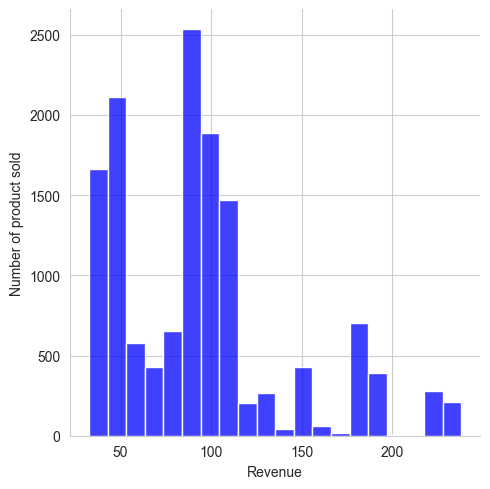

In [20]:
sns.displot(data=df, x='revenue', color='blue', bins=20)
plt.xlabel('Revenue')
plt.ylabel('Number of product sold')
plt.show()

### Spead of revenue for each sales method

The plot below shows that 'Email + Call' has the highest revenue, which means using both Email and Call to reach out to potential customers is the most effective sales method. This could be because email is a good way to reach out to large audiences, calling helps build a personal connection with potential customer.

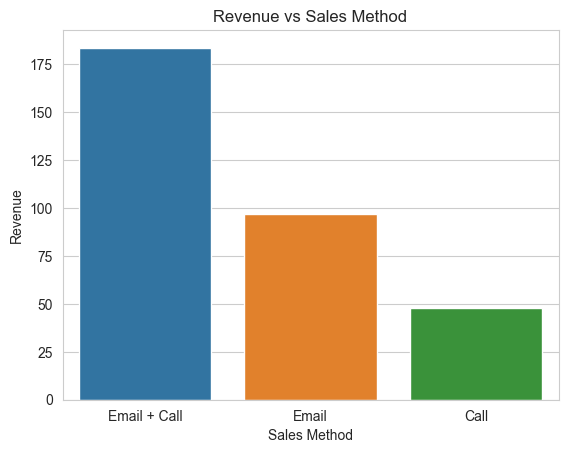

In [21]:
sns.barplot(y='revenue', x='sales_method', data=df, 
            order=['Email + Call', 'Email', 'Call'], errorbar=None)

# Add a title and labels to the axes
plt.title('Revenue vs Sales Method')
plt.xlabel("Sales Method")
plt.ylabel("Revenue")

# Show the plot
plt.show()

### Difference in revenue overtime for each sales method

Below is a graph that shows the revenue overtime for each method. As we can see 'Email + Call' is consistently higher than revenue for email or call alone. This means that the use of both email and call to reach out to potential customer is most effective sales method. 

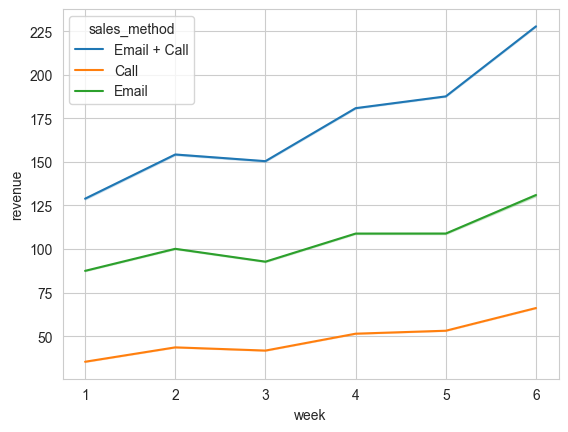

In [22]:
sns.lineplot(y='revenue', x='week', data=df, hue='sales_method')
plt.show()

### Business Metrics

Since our focus is to find a sales strategy that would work best to sell the new product line effectively. I would recommend we use **the percentage of Email + Call sales method in total number of sales for the past 6 week** as our metric.  

Based on our past 6 week data, 15% of the products were sold when potential customers were approached via 'Email + Call' sales method. Therefore, if this number is increased with the next line of product, it indicates that we have achieved our goal.

### Recommendation

For the upcoming weeks, I would recommend we focus on the following steps:

- Using key metrics to monitor whether there is a strong sign to see the increase in sale.
- Increase the number of customers approached by both sales method. 

**Data Collection for in-depth analysis**:
1. Improve data quality - we dont know how many people were approached by a single method. That includes sales that were not made even after being approached.
2. Need more data: Since the current data is only past 6 weeks, we need data around 6 months to have a better analysis. What         product is being sold for each customer.
